**Notebook enthält**
+ Anzahl der Artists und Songs, dazugehörige Verteilungen
+ Wordclouds
+ Worthäufigkeitsverteilungen nach Artist/ Genre
+ type-token-ratio
+ Durschnittstextlänge

In [1]:
import pandas as pd
import numpy as np
from collections import Counter

import matplotlib.pyplot as plt
import seaborn as sns

### Dataexploration

In [2]:
songs = pd.read_csv("../../song_decades_long.csv")
songs

,Unnamed: 0,artist,decades,text,stemmed_text,POS,Genre1,genre1,number_of_tokens,number_of_types
0,0,"""Weird Al"" Yankovic",1980s,potato skins potato cakes hash browns and i...,potato skin potato cake hash brown and instan...,french plain enough greasy sour lumpy tough en...,Rock,antiviral pop,12745.0,2264.0
1,37,"""Weird Al"" Yankovic",1990s,as i walk through the valley where i harvest m...,as i walk through the valley where i harvest ...,plain perfect fancy amish amish hard amish ami...,Rock,antiviral pop,10803.0,2317.0
2,65,"""Weird Al"" Yankovic",2000s,jillian was her name she was sweeter than asp...,jillian wa her name she wa sweeter than aspar...,same gorgeous perfect close sweet young ripe p...,Rock,antiviral pop,4352.0,1159.0
3,76,"""Weird Al"" Yankovic",2010s,my mama told me when i was hatched act like a...,my mama told me when i wa hatch act like a su...,red hard sure swiss crazy little okay crazy ev...,Rock,antiviral pop,2077.0,705.0
4,81,*NSYNC,1990s,here we go here we go one more time eve...,here we go here we go one more time everybodi...,fine fine free right fine right fine free time...,Electronic,boy band,1786.0,345.0
...,...,...,...,...,...,...,...,...,...,...
1033,13252,Zac Brown Band,2000s,you know i like my chicken fried cold beer on...,you know i like my chicken fri cold beer on a...,cold sweet pecan homemade much southern little...,"Folk, World, & Country",contemporary country,1582.0,399.0
1034,13257,Zac Brown Band,2010s,we never spoke a word but every thought she h...,we never spoke a word but everi thought she h...,foolish wise word thought room face face move ...,"Folk, World, & Country",contemporary country,5467.0,950.0
1035,13277,Zebra,1980s,well you're walking on the moon but there's n...,well you 're walk on the moon but there 's no...,deep real lucky kind about about deep lucky ki...,Rock,album rock,1105.0,225.0
1036,13281,Zero 7,2000s,i lie awake i've gone to ground i'm watching...,i lie awak i 've gone to ground i 'm watch po...,awake enough lonely long bad last old new weak...,Rock,downtempo,1333.0,337.0


#### explore data

In [6]:
artists = np.unique(songs.artist)
print(len(np.unique(songs.artist)))
np.unique(songs.decades)

466


array(['1950s', '1960s', '1970s', '1980s', '1990s', '2000s', '2010s',
       '2020s'], dtype=object)

In [9]:
mean ={}
for a in artists:
    mean[a] = int(np.mean(songs.number_of_tokens[songs.artist==a]))

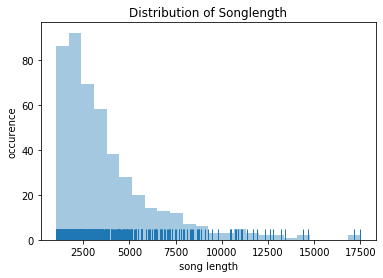

In [11]:
ax = sns.distplot(list(mean.values()), rug=True, kde=False)
ax.set_xlabel("song length")
ax.set_ylabel("occurence")
ax.set_title("Distribution of Songlength")
plt.savefig("songlength")
plt.show()

In [32]:
# c = Counter(songs.artist)
c = Counter(songs.decades)
c

Counter({'1980s': 174,
         '1990s': 231,
         '2000s': 276,
         '2010s': 202,
         '1970s': 113,
         '1960s': 35,
         '1950s': 5,
         '2020s': 2})

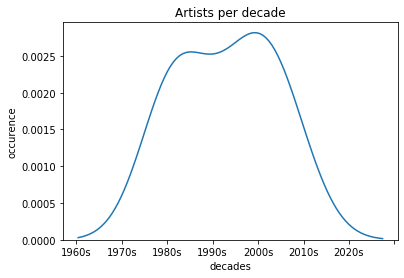

In [38]:
ax = sns.distplot(list(c.values()), hist=False)
ax.set_xlabel("decades")
ax.set_ylabel("occurence")
ax.set_title("Artists per decade")
x_ticks_labels = np.unique(songs.decades)
ax.set_xticklabels(x_ticks_labels)
plt.savefig("songnumber_per_artist_decades")
plt.show()

In [24]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer

cv = CountVectorizer(max_features=2000, min_df=10, max_df=300, stop_words='english')
cv.fit(songs['stemmed_text'])

results = cv.transform(songs['stemmed_text'])

features = cv.get_feature_names()

In [29]:
df_res = pd.DataFrame(results.toarray(), columns=features)
df_res = df_res.set_index(songs.Genre1)

In [30]:
df_res.loc['sum']=df_res.sum()
df_res = df_res.div(df_res.sum(axis=1), axis=0)

In [31]:
df_res.sort_values(by=['sum'], axis=1, inplace=True, ascending=False)
df_res

,la,ooh,ah,christma,em,music,alright,fuck,goodby,moment,...,louisiana,wink,sore,motor,social,dan,nighttim,opportun,concret,urg
Genre1,,,,,,,,,,,,,,,,,,,,,
Pop,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
Pop,0.382979,0.085106,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
Pop,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
Pop,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
Pop,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Rock,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
Rock,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
Rock,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000


In [91]:
df_res.to_csv('word_frequencies_bygenreandpos.csv')

In [92]:
df_res = pd.read_csv("word_frequencies_bygenreandpos.csv")

In [93]:
df_res = df_res.set_index(df_res.Genre1)
df_res

,Genre1,music,dead,black,body,ready,hot,round,rock,easy,...,airport,aisle,cottage,poverty,glue,ambition,bull,screamin,restaurant,lone
Genre1,,,,,,,,,,,,,,,,,,,,,
Pop,Pop,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
Pop,Pop,0.000000,0.030303,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
Pop,Pop,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.034483,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
Pop,Pop,0.000000,0.020000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
Pop,Pop,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Rock,Rock,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.058824,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
Rock,Rock,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.076923,0.076923,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
Rock,Rock,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000


In [94]:
df_res = df_res.drop("Genre1", axis=1)
df_res

,music,dead,black,body,ready,hot,round,rock,easy,feeling,...,airport,aisle,cottage,poverty,glue,ambition,bull,screamin,restaurant,lone
Genre1,,,,,,,,,,,,,,,,,,,,,
Pop,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
Pop,0.000000,0.030303,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
Pop,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.034483,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
Pop,0.000000,0.020000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
Pop,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.166667,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Rock,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.058824,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
Rock,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.076923,0.076923,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
Rock,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000


In [17]:
songs[songs.Genre1=="Hip Hop"]
np.unique(songs.Genre1)

array(['Electronic', 'Folk, World, & Country', 'Funk / Soul', 'Hip Hop',
       'Jazz', 'Pop', 'Reggae', 'Rock'], dtype=object)

In [57]:
abba = df_res[df_res.index=="Funk / Soul"]
abba.loc['sum']=abba.sum()
abba = abba.div(abba.sum(axis=1), axis=0)
abba.sort_values(by=['sum'], axis=1, inplace=True, ascending=False)
abba.head(2)

/home/teresa/anaconda3/lib/python3.7/site-packages/pandas/core/indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)


,ooh,honey,jesu,joy,lover,darl,sad,music,anyon,babe,...,deceiv,ding,cadillac,pair,beam,press,whip,divin,hood,urg
Genre1,,,,,,,,,,,,,,,,,,,,,
Funk / Soul,0.0,0.083333,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Funk / Soul,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


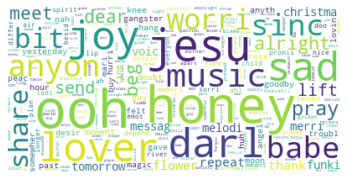

In [58]:
from wordcloud import WordCloud

def makeImage(text, figname):
    wc = WordCloud(background_color="white", max_words=1000)
    # generate word cloud
    wc.generate_from_frequencies(text)

    # show
    plt.imshow(wc, interpolation="bilinear")
    plt.axis("off")
    plt.savefig(figname)
    plt.show()

text = abba.loc['sum']
# text = abba.any()
makeImage(text, "wordcloud_pos_funksoul")

In [36]:
# np.unique(songs.artist)

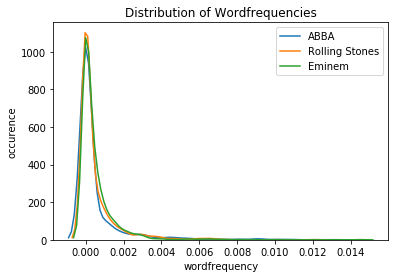

In [26]:
ax = sns.distplot(abba.loc['sum'], hist=False, label="ABBA")
ax = sns.distplot(stones.loc['sum'], hist=False, label="Rolling Stones")
ax = sns.distplot(eminem.loc['sum'], hist=False, label="Eminem")
ax.set_xlabel("wordfrequency")
ax.set_ylabel("occurence")
plt.title("Distribution of Wordfrequencies")
plt.savefig("distribution_wordfrequencies")
plt.legend()

In [37]:
# mfw = pd.read_csv("word_frequencies_bygenre.csv")
mfw = df_res.copy()
mfw = mfw.iloc[:,:31]
mfw.dropna()
# mfw = mfw.set_index(mfw.Genre1)
# mfw = mfw.drop("Genre1", axis=1)
mfw

,la,ooh,ah,christma,em,music,alright,fuck,goodby,moment,...,river,uh,lover,whoa,ladi,blow,jesu,truth,moon,mother
Genre1,,,,,,,,,,,,,,,,,,,,,
Pop,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000
Pop,0.382979,0.085106,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000
Pop,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.025000,0.000000,0.000000
Pop,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000
Pop,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Rock,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000
Rock,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000
Rock,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.00000,0.055556,0.000000,0.000000,0.000000,0.000000


In [38]:
abba = mfw[mfw.index=="Pop"]
abba.loc['sum']=abba.sum()
abba = abba.div(abba.sum(axis=1), axis=0)
# abba.sort_values(by=['sum'], axis=1, inplace=True, ascending=False)

/home/teresa/anaconda3/lib/python3.7/site-packages/pandas/core/indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)


In [39]:
stones = mfw[mfw.index=="Jazz"]
stones.loc['sum']=stones.sum()
stones = stones.div(stones.sum(axis=1), axis=0)
# stones.sort_values(by=['sum'], axis=1, inplace=True, ascending=False)

In [40]:
eminem = mfw[mfw.index=="Hip Hop"]
eminem.loc['sum']=eminem.sum()
eminem = eminem.div(eminem.sum(axis=1), axis=0)
# eminem.sort_values(by=['sum'], axis=1, inplace=True, ascending=False)

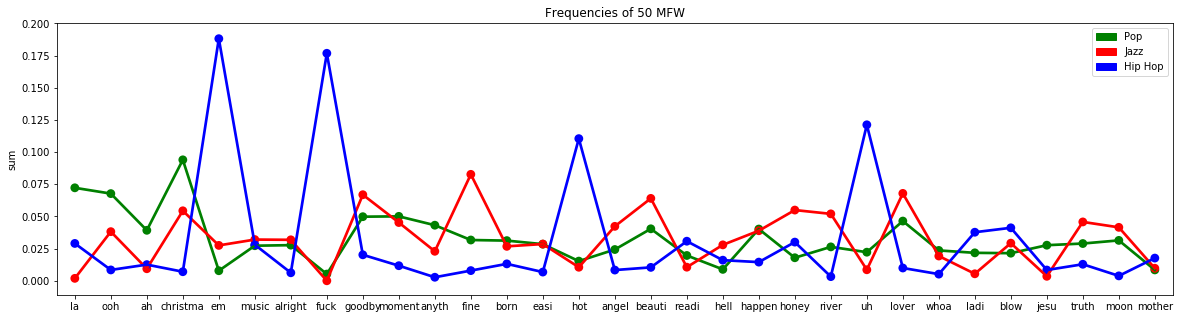

In [42]:
import matplotlib.patches as mpatches
green = mpatches.Patch(color='g', label='Pop')
red = mpatches.Patch(color='r', label='Jazz')
blue = mpatches.Patch(color='b', label='Hip Hop')


fig, ax = plt.subplots(figsize=(20,5))
ax = sns.pointplot(x=abba.columns, y=abba.loc['sum'],color='g')
ax = sns.pointplot(x=stones.columns, y=stones.loc['sum'], color='r')
ax = sns.pointplot(x=eminem.columns, y=eminem.loc['sum'], color='b')
plt.title("Frequencies of 50 MFW")
plt.legend(handles=[green, red, blue])
plt.savefig("freq_30mfw_genre")

### number of songs per genre

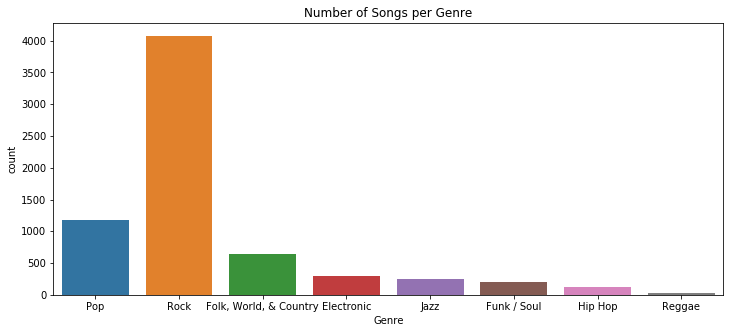

In [148]:
fig, ax = plt.subplots(figsize=(12,5))
ax = sns.countplot(x = songs.Genre1)
ax.set_xlabel("Genre")
plt.title("Number of Songs per Genre")
plt.savefig("songs_per_genre")

### songlength per genre

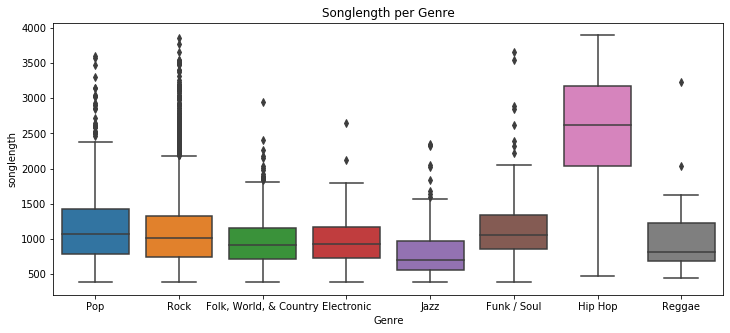

In [152]:
fig, ax = plt.subplots(figsize=(12,5))
sns.boxplot(x=songs.Genre1, y=songs.number_of_tokens)
ax.set_ylabel("songlength")
ax.set_xlabel("Genre")
plt.title("Songlength per Genre")
plt.savefig("songlength_per_genre")

#### sample data

In [15]:
songs_sample = songs.copy()
songs_sample = songs_sample.sample(frac=.25, replace=False, random_state=42)
songs_sample

,artist,song,text,number_of_tokens
20468,Van Halen,Take Your Whiskey Home,"[well, my, baby, she, don't, want, me, around....",224
41605,Lil Wayne,Army Gunz,"[yeah, yeah, yeah, (i, got, army, gunz), yeah,...",578
52292,Stevie Wonder,Isn't She Lovely,"[isn't, she, lovely, isn't, she, wonderful, is...",108
42697,Mariah Carey,O Holy Night,"[o, holy, night, the, stars, are, brightly, sh...",78
27993,Clash,I'm So Bored With The U.S.A.,"[yankee, soldier, he, want, to, shoot, some, s...",113
...,...,...,...,...
25325,Billie Holiday,My Last Affair,"[can't, you, see, what, love, and, romance, ha...",97
28783,Dave Matthews Band,The Space Between,"[you, cannot, quit, me, so, quickly, is, no, h...",310
18645,Squeeze,Crying In My Sleep,"[breaking, up, is, breaking, my, heart, is, sh...",178
32684,Foo Fighters,Dear Lover,"[dear, lover, do, you, remember?, the, sound, ...",134


In [16]:
songs_sample.to_csv("sample_25percent.csv")

### type vs. token ratio

In [9]:
ohne_rock = songs.copy()
ohne_rock = ohne_rock[ohne_rock.Genre1!='Rock']
ohne_rock = ohne_rock[ohne_rock.Genre2!=' Rock']

ohne_pop_rock = ohne_rock.copy()
ohne_pop_rock = ohne_pop_rock[ohne_pop_rock.Genre1!='Pop']
ohne_pop_rock = ohne_pop_rock[ohne_pop_rock.Genre2!=' Pop']
ohne_pop_rock.head(2)

,Unnamed: 0,Unnamed: 0.1,Unnamed: 0.1.1,song,date,artist,link,text,Genre1,Genre2,number_of_tokens,stemmed_text,POS,decades,number_of_types
639,639,639,639,A Fine Romance,1992,Billie Holiday,/b/billie+holiday/a+fine+romance_20017878.html,a fine romance with no kisses a fine romance...,Jazz,Blues,125,a fine romanc with no kiss a fine romanc my f...,fine fine hot cold fine fine old fine fine goo...,1990s,75.0
640,640,640,640,All Or Nothing At All,1958,Billie Holiday,/b/billie+holiday/all+or+nothing+at+all_200180...,all or nothing at all half love never appeale...,Jazz,Blues,127,all or noth at all half love never appeal to ...,half weak nothing love heart nothing nothing l...,1950s,74.0


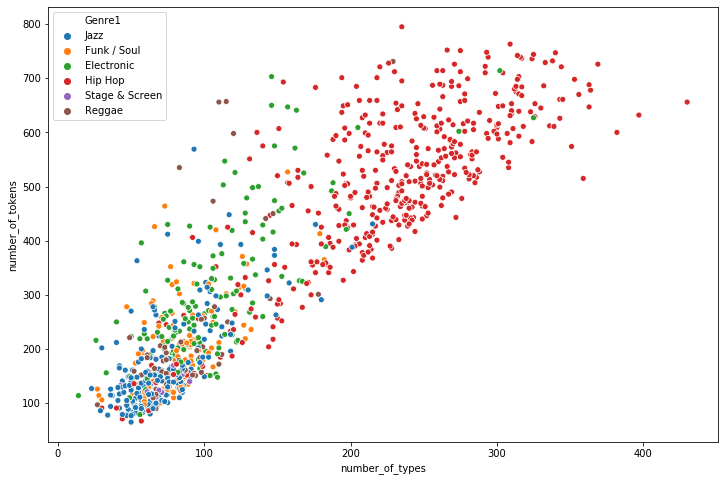

In [6]:
plt.figure(figsize=(12,8))
sns.scatterplot(x='number_of_types', y='number_of_tokens',hue='Genre1', data=ohne_pop_rock)
plt.savefig('../../images/type_token_ratio_ohne_pop_rock')

### minimise dataset

In [42]:
mean = np.mean(songs.number_of_tokens)
mean

223.20902054182793

In [44]:
s = songs.copy()
s = s[s.number_of_tokens > mean]
s

,Unnamed: 0,song,artist,link,text,stemmed_text,POS,POS_tags,Genre1,Genre2,genre1,genre2,number_of_tokens,number_of_types,date,decades
0,0,"Andante, Andante",ABBA,/a/abba/andante+andante_20002708.html,take it easy with me please touch me gently ...,take it easi with me pleas touch me gentli li...,easy slow andante soft light andante strong st...,"['VB', 'PRP', 'JJ', 'IN', 'PRP', '_SP', 'UH', ...",Pop,Rock,europop,swedish pop,260.0,87.0,1980,1980s
1,1,As Good As New,ABBA,/a/abba/as+good+as+new_20003033.html,i'll never know why i had to go why i had to ...,i 'll never know whi i had to go whi i had to...,lousy rotten tough enough good new good new ne...,"['PRP', 'MD', 'RB', 'VB', 'WRB', 'PRP', 'VBD',...",Pop,Rock,europop,swedish pop,312.0,120.0,1979,1970s
3,3,Cassandra,ABBA,/a/abba/cassandra_20002811.html,down in the street they're all singing and sho...,down in the street they 're all sing and shou...,alive dead hollow smart sorry last sorry final...,"['IN', 'IN', 'DT', 'NN', 'PRP', 'VBP', 'DT', '...",Pop,Rock,europop,swedish pop,361.0,157.0,1981,1980s
4,4,Chiquitita,ABBA,/a/abba/chiquitita_20002978.html,chiquitita tell me what's wrong you're encha...,chiquitita tell me what 's wrong you 're ench...,wrong own sad quiet sure new new hard sad quie...,"['NNP', '_SP', 'VB', 'PRP', 'WP', 'VBZ', 'JJ',...",Pop,Rock,europop,swedish pop,304.0,119.0,1979,1970s
5,5,Crazy World,ABBA,/a/abba/crazy+world_20003013.html,i was out with the morning sun couldn't sleep...,i wa out with the morn sun could n't sleep so...,front crazy stunned crazy other stupid blind l...,"['PRP', 'VBD', 'RB', 'IN', 'DT', 'NN', 'NN', '...",Pop,Rock,europop,swedish pop,304.0,143.0,1975,1970s
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
33582,33614,Like I Would,ZAYN,/z/zayn+malik/like+i+would_21107223.html,[verse 1] hey what's up it's been a while t...,[ vers 1 ] hey what 's up it 's been a while ...,cold hearted hearted late wired good cold hear...,"['-LRB-', 'NN', 'CD', '-RRB-', '_SP', 'UH', 'W...",Pop,Rock,dance pop,electropop,357.0,97.0,2016,2010s
33583,33615,PillowTalk,ZAYN,/z/zayn+malik/pillowtalk_21106267.html,[verse 1] climb on board we'll go slow and h...,[ vers 1 ] climb on board we 'll go slow and ...,slow high light dark hard mellow pre close clo...,"['-LRB-', 'NN', 'CD', '-RRB-', '_SP', 'NN', 'I...",Pop,Rock,dance pop,electropop,363.0,98.0,2016,2010s
33584,33616,Rear View,ZAYN,/z/zayn+malik/rear+view_21107627.html,[verse 1] can your heart be mine in search? ...,[ vers 1 ] can your heart be mine in search ?...,absurd pre pre tired rear verse heart mine sea...,"['-LRB-', 'NN', 'CD', '-RRB-', '_SP', 'MD', 'P...",Pop,Rock,dance pop,electropop,277.0,98.0,2016,2010s
33585,33617,As I Said Before,Zebra,/z/zebra/as+i+said+before_10198473.html,and i said before i don't want no more and i...,and i said befor i do n't want no more and i ...,insane insane sure crazy pleasant little secon...,"['CC', 'PRP', 'VBD', 'IN', '_SP', 'PRP', 'VBP'...",Rock,Electronic,album rock,glam metal,228.0,79.0,1983,1980s


#### type  vs.  token pro Genre

In [3]:
df = pd.read_csv("../../various_datasets/songs_plus_dates.csv")
df.head()

,Unnamed: 0,song,artist,link,text,stemmed_text,POS,POS_tags,Genre1,Genre2,genre1,genre2,number_of_tokens,number_of_types,date,decades
0,0,"Andante, Andante",ABBA,/a/abba/andante+andante_20002708.html,take it easy with me please touch me gently ...,take it easi with me pleas touch me gentli li...,easy slow andante soft light andante strong st...,"['VB', 'PRP', 'JJ', 'IN', 'PRP', '_SP', 'UH', ...",Pop,Rock,europop,swedish pop,260.0,87.0,1980,1980s
1,1,As Good As New,ABBA,/a/abba/as+good+as+new_20003033.html,i'll never know why i had to go why i had to ...,i 'll never know whi i had to go whi i had to...,lousy rotten tough enough good new good new ne...,"['PRP', 'MD', 'RB', 'VB', 'WRB', 'PRP', 'VBD',...",Pop,Rock,europop,swedish pop,312.0,120.0,1979,1970s
2,2,Bang-A-Boomerang,ABBA,/a/abba/bang+a+boomerang_20002668.html,making somebody happy is a question of give an...,make somebodi happi is a question of give and...,happy little sweet sweet tender dumb dumb dumb...,"['VBG', 'NN', 'JJ', 'VBZ', 'DT', 'NN', 'IN', '...",Pop,Rock,europop,swedish pop,198.0,101.0,1975,1970s
3,3,Cassandra,ABBA,/a/abba/cassandra_20002811.html,down in the street they're all singing and sho...,down in the street they 're all sing and shou...,alive dead hollow smart sorry last sorry final...,"['IN', 'IN', 'DT', 'NN', 'PRP', 'VBP', 'DT', '...",Pop,Rock,europop,swedish pop,361.0,157.0,1981,1980s
4,4,Chiquitita,ABBA,/a/abba/chiquitita_20002978.html,chiquitita tell me what's wrong you're encha...,chiquitita tell me what 's wrong you 're ench...,wrong own sad quiet sure new new hard sad quie...,"['NNP', '_SP', 'VB', 'PRP', 'WP', 'VBZ', 'JJ',...",Pop,Rock,europop,swedish pop,304.0,119.0,1979,1970s


In [10]:
pop = df[df.Genre1=='Pop']
clas = df[df.Genre1=='Classical']
elec = df[df.Genre1=='Electronic']
country = df[df.Genre1=='Folk, World, & Country']
funk = df[df.Genre1=='Funk / Soul']
hiphop = df[df.Genre1=='Hip Hop']
jazz = df[df.Genre1=='Jazz']
latin = df[df.Genre1=='Latin']
reggae = df[df.Genre1=='Reggae']
rock = df[df.Genre1=='Rock']
stage = df[df.Genre1=='Stage & Screen']

In [11]:
print('Pop:', np.mean(pop.number_of_types/pop.number_of_tokens))
print('Classical:', np.mean(clas.number_of_types/clas.number_of_tokens))
print('Electronic:', np.mean(elec.number_of_types/elec.number_of_tokens))
print('Country:', np.mean(country.number_of_types/country.number_of_tokens))
print('Funk:', np.mean(funk.number_of_types/funk.number_of_tokens))
print('HipHop:', np.mean(hiphop.number_of_types/hiphop.number_of_tokens))
print('Jazz:', np.mean(jazz.number_of_types/jazz.number_of_tokens))
print('Latin:', np.mean(latin.number_of_types/latin.number_of_tokens))
print('Reggae:', np.mean(reggae.number_of_types/reggae.number_of_tokens))
print('Rock:', np.mean(rock.number_of_types/rock.number_of_tokens))
print('Stage:', np.mean(stage.number_of_types/stage.number_of_tokens))

Pop: 0.4556570282041374
Classical: 0.6929825925321261
Electronic: 0.4954875566584803
Country: 0.5256661446411699
Funk: 0.451725428388769
HipHop: 0.5090929288268752
Jazz: 0.5208521285419127
Latin: 0.5478021586928905
Reggae: 0.469732149340226
Rock: 0.5032732111159923
Stage: 0.5399872836063185


In [ ]:
plt.figure(figsize=(12,8))
sns.scatterplot(x='number_of_types', y='number_of_tokens',hue='Genre1', data=ohne_pop_rock)
plt.savefig('../../images/type_token_ratio_ohne_pop_rock')

#### Songs pro Genre

In [48]:
s.to_csv('../../songs_longtexts.csv')

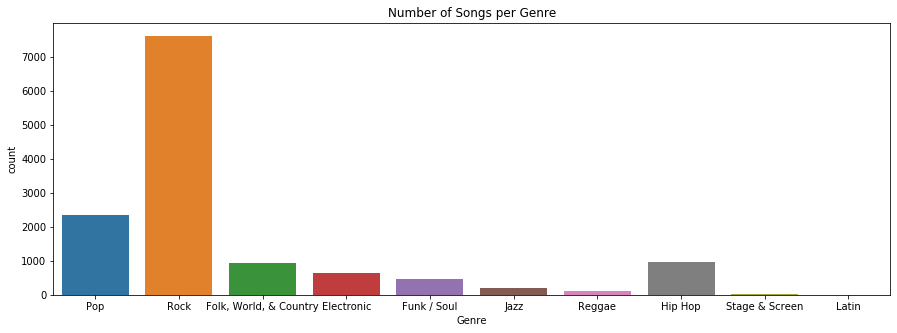

In [6]:
fig, ax = plt.subplots(figsize=(15,5))
ax = sns.countplot(x = s.Genre1)
ax.set_xlabel("Genre")
plt.title("Number of Songs per Genre")
plt.savefig("../../images/longtexts/songs_per_genre")

In [7]:
ohne_rock = s.copy()
ohne_rock = ohne_rock[ohne_rock.Genre1!='Rock']
ohne_rock = ohne_rock[ohne_rock.Genre2!=' Rock']

ohne_pop_rock = ohne_rock.copy()
ohne_pop_rock = ohne_pop_rock[ohne_pop_rock.Genre1!='Pop']
ohne_pop_rock = ohne_pop_rock[ohne_pop_rock.Genre2!=' Pop']
ohne_pop_rock.head(2)

,Unnamed: 0,song,artist,link,text,stemmed_text,POS,POS_tags,Genre1,Genre2,genre1,genre2,number_of_tokens,number_of_types,date,decades
753,753,Cheek To Cheek,Billie Holiday,/b/billie+holiday/cheek+to+cheek_20017814.html,heaven i'm in heaven and my heart beats so t...,heaven i 'm in heaven and my heart beat so th...,lucky much much much much heart happiness chee...,"['NNP', '_SP', 'PRP', 'VBP', 'IN', 'NNP', '_SP...",Jazz,Blues,adult standards,jazz blues,263.0,75.0,1958,1950s
764,764,Gimmie A Pigfoot,Billie Holiday,/b/billie+holiday/gimmie+a+pigfoot_10033262.html,wesley 'sox' wilson up in harlem every satu...,wesley 'sox ' wilson up in harlem everi satur...,right full rhythm night night hop way town cor...,"['NNP', '``', 'NNP', ""''"", 'NNP', '_SP', 'RP',...",Jazz,Blues,adult standards,jazz blues,224.0,122.0,2020,2020s


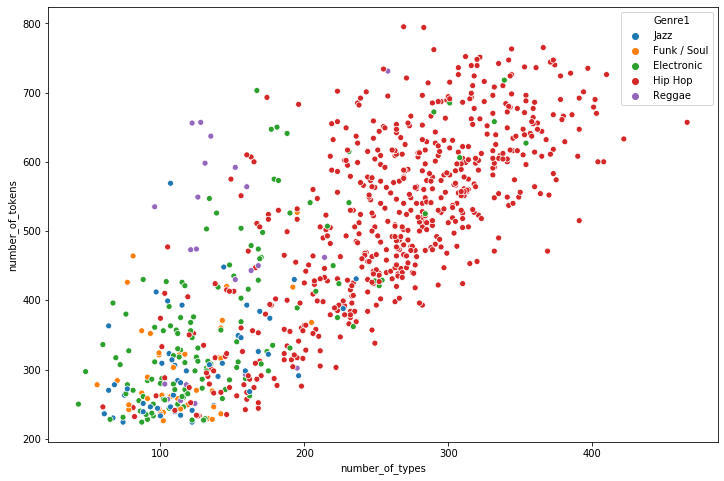

In [11]:
plt.figure(figsize=(12,8))
sns.scatterplot(x='number_of_types', y='number_of_tokens',hue='Genre1', data=ohne_pop_rock)
plt.savefig('../../images/longtexts/type_token_ratio_ohnepoprock')

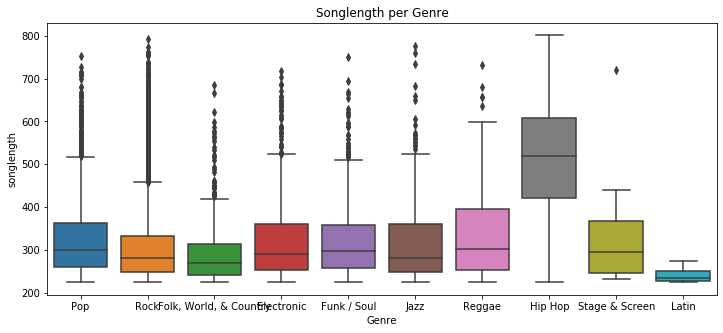

In [12]:
fig, ax = plt.subplots(figsize=(12,5))
sns.boxplot(x=s.Genre1, y=s.number_of_tokens)
ax.set_ylabel("songlength")
ax.set_xlabel("Genre")
plt.title("Songlength per Genre")
plt.savefig("../../images/longtexts/songlength_per_genre")

In [49]:
s = pd.read_csv('../../songs_longtexts.csv')

In [54]:
counts = Counter(s.decades)
count = sorted(counts.items())
summe = (sum(counts.values()))

labels = []
values = []

for c in count:
    labels.append(c[0])
    values.append(float(c[1])/summe)
    
print(labels, values)

['0', '1930s', '1940s', '1950s', '1960s', '1970s', '1980s', '1990s', '2000s', '2010s', '2020s'] [7.518796992481203e-05, 0.0002255639097744361, 0.0007518796992481203, 0.004135338345864661, 0.03007518796992481, 0.11022556390977443, 0.15796992481203007, 0.21037593984962405, 0.26894736842105266, 0.2138345864661654, 0.0033834586466165413]


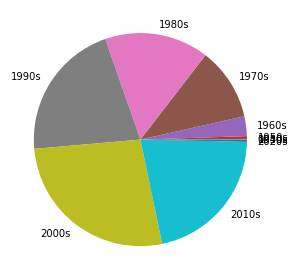

In [55]:
plt.pie(values, labels=labels, autopct=None)
plt.tight_layout()
plt.savefig("../../images/longtexts/decades_pie")

### Genres - Oberbegriffe

In [98]:
s = songs.copy()
s = s[s.genre1.notnull()]
for i,row in s.iterrows():
    if type(row.genre1) != str:
        print(i)

In [99]:
pop = s[s.Genre1=='Rock']
pop = pop[['genre1', 'genre2']]

In [100]:
genre1 = Counter(pop.genre1)
genre2 = Counter(pop.genre2)

In [101]:
df = pd.DataFrame.from_dict(genre1, orient='index').reset_index()
df = df.rename(columns={'index':'genre1', 0:'count1'})

df2 = pd.DataFrame.from_dict(genre2, orient='index').reset_index()
df2 = df2.rename(columns={'index':'genre2', 0:'count2'})

In [102]:
df3 =  pd.concat([df, df2], axis=1, sort=False)
df3

,genre1,count1,genre2,count2
0,comedy,43.0,comic,43
1,album rock,6342.0,classic rock,2224
2,country,184.0,country road,153
3,alternative metal,1523.0,art rock,2377
4,adult standards,1153.0,blues rock,1184
...,...,...,...,...
112,NaN,NaN,australian indie,30
113,NaN,NaN,crossover thrash,12
114,NaN,NaN,electronica,20
115,NaN,NaN,electroclash,6


In [103]:
df3.to_csv('rock_genre1_2.csv')